For any image processing, simple or complex -  usually we will follow particular steps...

Methods in implementing those steps may vary. Step order only change based on output requirements.

This notebook contains my notes on multiple steps in image processing and commonly used methods

 

- 2D Convolution (Image Filtering) : cv2.filter2D()

- Image Blurring (Image Smoothing)
    - Averaging : cv2.blur() or cv2.boxFilter()
    - Gaussian Blurring : cv2.GaussianBlur()
    - Median Blurring : cv2.medianBlur()
    - Bilateral Filtering - cv2.bilateralFilter()
- Image Gradients (edge detection)
    - Sobel and Scharr Operator : cv2.Sobel()
    - Laplace Operators
    - Canny Operator : cv2.Canny()
- Thresholding : cv2.threshold()
- Dectecting contours : cv2.findcontours()
- contour Features
- Image moments
- Erosions and Dilations
- Masking and bitwise operators
   



## 2D Convolution ( Image Filtering )

https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc 

> Low Pass Filters(LPF) helps in removing noises, blurring the images etc. 

> High Pass Filters(HPF) helps in finding edges in the images.


OpenCV provides a function **cv2.filter2D()** to convolve a kernel with an image. 


## Image Blurring (Image Smoothing)

It is applying filters to blur the image. 

https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

Image blurring is achieved by convolving the image with a low-pass filter kernel. 
- It is useful for removing noises. 
- It actually removes high frequency content (eg: noise, edges) from the image. 
    - So edges are blurred a little bit in this operation. 
- There are blurring techniques which doesn't blur the edges too. (Bilateral Filtering)

OpenCV provides mainly four types of blurring techniques.


### 1. Averaging

This is done by convolving image with a normalized box filter. 
- It simply takes the average of all the pixels under kernel area and replace the central element.
- We should specify the width and height of kernel

This is done by the function ***cv2.blur() or cv2.boxFilter()***. 

> If you don't want to use normalized box filter, use cv2.boxFilter(). Pass an argument normalize=False to the function.


### 2. Gaussian Blurring

In this, instead of box filter, gaussian kernel is used. 

***Gaussian blurring is highly effective in removing gaussian noise from the image.***

> It is done with the function, ***cv2.GaussianBlur()*** 

- We should specify the width and height of kernel which ***should be positive and odd*** 
- We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. 
    - If only sigmaX is specified, sigmaY is taken as same as sigmaX. 
    - If both are given as zeros, they are calculated from kernel size. 


> If you want, we can create a Gaussian kernel with the function, cv2.getGaussianKernel().

In Gaussian kernel the elements follow a gaussian distribution with given standard deviation, good explination and intuition in below videos

https://www.youtube.com/watch?v=C_zFhWdM4ic - Computerphile channel (good one)

https://www.youtube.com/watch?v=uihBwtPIBxM


### 3. Median Blurring

The function ***cv2.medianBlur()*** _takes median of all the pixels under kernel area and central element is replaced with this median value_ 

- ***This is highly effective against salt-and-pepper noise in the images.*** 
- It reduces the noise effectively. 
- Its kernel size should be a positive odd integer

Interesting thing is that, in median blurring, central element is always replaced by some pixel value in the image. 
- But in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. 


### 4. Bilateral Filtering

***cv2.bilateralFilter()*** _is highly effective in noise removal while keeping edges sharp._ 

But the operation is slower compared to other filters. 

We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

***Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference.*** Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

example - the texture on the surface will be gone, but edges are preserved

# Image Gradients

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. 

### Sobel and Scharr Derivatives

Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise(keeps high frequencies intact i.e minute details).

- ddepth means desired depth of the destination image

    - It has information about what kinds of data stored in an image, and that can be unsigned char (CV_8U), signed char (CV_8S), unsigned short (CV_16U), and so on...
    - https://docs.opencv.org/2.4/modules/core/doc/intro.html#fixed-pixel-types-limited-use-of-templates
- You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). 

- You can also specify the size of kernel by the argument ksize. 

    - ***If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.***

Please see the docs for kernels used.

### Laplacian Derivatives
calculates the Laplacian of the image given by the relation, 
   > \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} 

where each derivative is found using Sobel derivatives. 


Sobel filter : 
    - https://en.wikipedia.org/wiki/Sobel_operator#Alternative_operators
- Horizontal filter/kernel : [[1,2,1],[0,0,0],[-1,-2,-2]]
- Vertical : rotate horizontal by 90 degrees. Middle column should be zero 
- https://www.youtube.com/watch?v=uihBwtPIBxM
- https://www.youtube.com/watch?v=am36dePheDc

Scharr filter : 
- Horitonzal : [[3,10,3],[0,0,0],[-3,-10,-3]] 




In DNN, we try to find the kernel weights using back propogation to find the edges 
    - https://www.youtube.com/watch?v=am36dePheDc


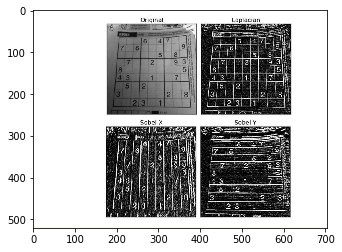

In [14]:
image = cv2.imread("image_gradients_compare.PNG")
plt.imshow(image)

Edge detection is useful for finding boundaries of objects in an image — it is effective for segmentation purposes.

Popular algorithm - developed by John F. Canny in 1986

### Canny Edge Detector

> Canny algo works on the output of Sobel and improves on it.
    - 1. It thins the edges and makes it sharper
    - 2. Does Hysteresis thresholding - basically - it keeps those edges based on strong edges in given high and low range

Very good explination - https://www.youtube.com/watch?v=sRFM5IEqR2w (computerphile channel)

We provide three parameters to the cv2.Canny function:

    img : The gray  image.
    minVal : A minimum threshold, in our case 30 .
    maxVal : The maximum threshold which is 150 in our example.
    aperture_size : The Sobel kernel size. By default this value is 3  and hence is not added.

Different values for the minimum and maximum thresholds will return different edge maps.




### Thresholding

Image thresholding is an important intermediary step for image processing pipelines. 

Thresholding can help us to remove lighter or darker regions and contours of images.


- Grabbing all pixels in the gray  image greater than 225 and setting them to 0 (black) which corresponds to the background of the image
- Setting pixel vales less than 225 to 255 (white) which corresponds to the foreground of the image (i.e., the Tetris blocks themselves).

threshold the image by setting all pixel values less than 225 to 255 (white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image


### Detecting contours

We use cv2.findContours  to detect the contours in the image. 
 - Take note of the parameter flags but for now let’s keep things simple — our algorithm is finding all foreground (white) pixels in the thresh.copy() image.

cv2.findContours(image, mode, method)

> cv2.findContours implementation changed between OpenCV 2.4, OpenCV 3, and OpenCV 4.

> implemtation incorporated in updated imutils package in grab_contours() method

    # if the length the contours tuple returned by cv2.findContours
    # is '2' then we are using either OpenCV v2.4, v4-beta, or
    # v4-official
    if len(cnts) == 2:
        cnts = cnts[0]

    # if the length of the contours tuple is '3' then we are using
    # either OpenCV v3, v4-pre, or v4-alpha
    elif len(cnts) == 3:
        cnts = cnts[1]

We make a copy of the original image so that we can draw contours on it

We draw each c from the cnts list on the image using the appropriately named cv2.drawContours. 

cv2.drawContours(image, contours, contourIdx, color, thicknes)
- image : on which contours has to be drawn
- contours : list of contour arrays
- contourIdx : Parameter indicating a contour to draw. If it is negative, all the contours are drawn.
    - Here we are looping through one contour only so we can give either 0 or -1;
- color : Here I chose purple which is represented by the tuple (240, 0, 159).
- thickness : draw each contour on the output image with a 3px thick purple outline, then display the output contours one at a time

### Find Contours method

> cv2.findContours(image, mode, method) -> returns image, contours, hierarchy

 
mode arguments:
    - cv2.RETR_EXTERNAL gives returns only extreme outer flags
     - cv2.RETR_LIST retrieves all the contours, but doesn't create any parent-child relationship
     - cv2.RETR_CCOMP retrieves all the contours and arranges them to a 2-level hierarchy
     - cv2.RETR_TREE retrieves all the contours and creates a full family hierarchy list

About hierarchy (and mode selection)-> https://docs.opencv.org/3.3.1/d9/d8b/tutorial_py_contours_hierarchy.html
     
----------------

method arguments:
    - cv2.CHAIN_APPROX_NONE all the boundary points are stored
    - cv2.CHAIN_APPROX_SIMPLE removes all redundant points and compresses the contour, thereby saving memory
    
About Contour Approximation Methods -> https://docs.opencv.org/3.1.0/d4/d73/tutorial_py_contours_begin.html


### Contour features -

https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html

1. Moments 
    - M = cv2.moments(cnt)
    - cx = int(M['m10']/M['m00'])
    - cy = int(M['m01']/M['m00'])
2. Contour Area 
     ## area = cv2.contourArea(cnt)
>     or from moments, area = M['m00'] 
for binary images or for greytone images


3. Contour Perimeter 
    - also called arc length. 
    - It can be found out using cv2.arcLength() function. Second argument specify whether shape is a closed contour (if passed True), or just a curve.
      ## perimeter = cv2.arcLength(cnt,True)
      
      
4. Contour Approximation 
    - approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm.
    - To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn't get a perfect square, but a "bad shape" (As shown in first image in webpage). Now you can use this function to approximate the shape. 
    - ***In this, second argument is called epsilon, which is maximum distance from contour to approximated contour.*** 
        - It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output. 
    #### epsilon = 0.1*cv2.arcLength(cnt,True)
    #### approx = cv2.approxPolyDP(cnt,epsilon,True)
5. Convex Hull 
6. Checking Convexity 
    - There is a function to check if a curve is convex or not, cv2.isContourConvex(). 
    - It just return whether True or False. Not a big deal. 
    
    **k = cv2.isContourConvex(cnt)**
7. Bounding Rectangle 
    - There are two types of bounding rectangles.
    
7.a. Straight Bounding Rectangle
    - It is a straight rectangle, 
    - it doesn't consider the rotation of the object. 
    - So area of the bounding rectangle won't be minimum. 
    - It is found by the function
   > cv2.boundingRect()

7.b. Rotated Rectangle
    - Here, bounding rectangle is drawn with minimum area, 
    - so it considers the rotation also. 
        - The function used is cv2.minAreaRect()
    - It returns a Box2D structure which contains following detals 
        - ( center (x,y), (width, height), angle of rotation ). 
    - But to draw this rectangle, we need 4 corners of the rectangle. 
        - It is obtained by the function cv2.boxPoints() 
   >rect = cv2.minAreaRect(cnt)
   
   >box = cv2.boxPoints(rect)

   >box = np.int0(box)
   
   >cv2.drawContours(img,[box],0,(0,0,255),2)

8. Minimum Enclosing Circle 
    - To find the circumcircle of an object using the function cv2.minEnclosingCircle(). 
    - It is a circle which completely covers the object with minimum area. 
    
>(x,y),radius = cv2.minEnclosingCircle(cnt)

>center = (int(x),int(y))

>radius = int(radius)

>cv2.circle(img,center,radius,(0,255,0),2)

9. Fitting an Ellipse 

10. Fitting a Line 

### Image moments - 
https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/
- A blob is a group of connected pixels in an image that shares some common property (e.g grayscale value).our goal is to find the center of a binary blob using OpenCV in Python and C++. If the shape we are interested in is not binary, we have to binarize it first.
- The centroid of a shape is the arithmetic mean (i.e. the average) of all the points in a shape. Suppose a shape consists of n distinct points x1...xn, then the centroid is given by

    > c= (1 over n)sigma (xi/n) where i = 1 to n 

- In the context of image processing and computer vision, each shape is made of pixels, and the centroid is simply the weighted average of all the pixels constituting the shape.

    - We can find the center of the blob using moments in OpenCV. But first of all, we should know what exactly Image moment is all about. 
    - #### Image Moment is a particular weighted average of image pixel intensities, with the help of which we can find some specific properties of an image, like radius, area, centroid etc. 
    - To find the centroid of the image, we generally convert it to binary format and then find its center.

The centroid is given by the formula:-
>    Cx = M10/M00


>    Cy = M01/M00

Cx is the x coordinate and Cy is the y coordinate of the centroid and M denotes the Moment

**Center of multiple blobs in an Image**

Finding the center of only one blob is quite easy, but what if there are multiple blobs in the Image? Well then, we will have to use findContours to find the number of contours in the Image and find the center of each of them. 

### Erosions and dilations

Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding).

#### Erode
Using OpenCV we can erode contours, effectively making them smaller or causing them to disappear completely with sufficient iterations. 
- This is typically useful for removing small blobs in mask image. 
- To reduce the size of foreground objects we can erode away pixels given a number of iterations

#### Dilation
In an image processing pipeline if you ever have the need to connect nearby contours, you can apply dilation to the image. 
Shown in the figure below is the result of dilating contours with five iterations, but not to the point of two contours becoming one

### Masking and bitwise operations

Masks allow us to “mask out” regions of an image we are uninterested in. We call them “masks” because they will hide regions of images we do not care about.

- ***When using the thresholded image as the mask in comparison to our original image, the colored regions reappear as the rest of the image is “masked out”. This is, of course, a simple example, but as you can imagine, masks are very powerful.***

	
> A _typical operation_ we may want to apply is to take our mask and ***apply a bitwise AND*** to our input image, keeping only the masked regions

## Explinations/notes to issues/questions faced while coding

#### The single star * unpacks the sequence/collection into positional arguments, The double star ** does the same, only using a dictionary and thus named arguments.

    - https://stackoverflow.com/a/2921893/74457720


#### Sorting 2 lists based on one of them

    - https://stackoverflow.com/questions/38240236/python-sorting-a-zip-based-on-length-and-weight
    - https://stackoverflow.com/a/13668421/7445772


I want to sort list1 based on list2 (weights) in descending and whenever the weight of two items are the same

>list1 = [["A"],["A","B"],["B","D"],["C"],["A","B","D"]]

>list2 = [5,10,10,15,10]

(for example both x = ["A","B","D"] and y = ["B","D"] have the weight of 10), the one with larger length comes first. For list1 and list 2, I want the output to be like:

> [["C"], ["A","B","D"], ["A","B"],["B","D"],["A"]] 


***Answer:*** In order to sort by several parameters your key function should return a tuple:

> #### sorted(zip(list1, list2), key=lambda x: (x[1], len(x[0])), reverse=True)


> [(['C'], 15),
 (['A', 'B', 'D'], 10),
 (['A', 'B'], 10),
 (['B', 'D'], 10),
 (['A'], 5)]


***The key=lambda x: (x[1], len(x[0])) should be read as "firstly order by the weight in the x[1] and then by the length of a list in x[0]".***

In order to retrieve first element from each tuple you may wrap the result into a list comprehension:

> [x[0] for x in sorted(zip(list1, list2), key=lambda x: (x[1], len(x[0])), reverse=True)]

> [['C'], ['A', 'B', 'D'], ['A', 'B'], ['B', 'D'], ['A']]



### The “pixels per metric” ratio

***In order to determine the size of an object in an image, we first need to perform a “calibration” using a reference object.***

Our reference object should have two important properties:

- We should know the dimensions of this object (in terms of width or height) in a measurable unit (such as millimeters, inches, etc.).
- We should be able to easily find this reference object in an image, either based on the placement of the object (such as the reference object always being placed in the top-left corner of an image) or via appearances (like being a distinctive color or shape, unique and different from all other objects in the image). 

In either case, our reference should should be uniquely identifiable in some manner.


By guaranteeing the reference is the left-most object, we can sort our object contours from left-to-right, grab the reference (which will always be the first contour in the sorted list), and use it to define our pixels_per_metric, which we define as:

> pixels_per_metric = object_width / know_width

**If reference has a known_width of 0.955 inches. Now, suppose that our object_width (measured in pixels) is computed be 150 pixels wide (based on its associated bounding box).**

The pixels_per_metric is therefore:

> pixels_per_metric = 150px / 0.955in = 157px

### Thus implying there are approximately 157 pixels per every 0.955 inches in our image. Using this ratio, we can compute the size of objects in an image.
